In [451]:
#Sklearn

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.utils import resample,shuffle
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
from sklearn.metrics import make_scorer, precision_score, recall_score,f1_score, accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import make_scorer,precision_score,recall_score,accuracy_score,f1_score

#NLTK
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from IPython.display import display, HTML
#Other
import pandas as pd
import re
import string
import matplotlib.pyplot as pypl
import numpy as np
import seaborn as sd

In [452]:
kag = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Post Upvotes\ Kaguya-sama episodes posts votes .csv',index_col=0, encoding='utf-8-sig')
ten = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Post Upvotes\ Tensei Slime episodes posts votes .csv',index_col=0, encoding='utf-8-sig')
bog = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Post Upvotes\ Boogiepop Wa Waranai episodes posts votes .csv',index_col=0, encoding='utf-8-sig')

# Kaguya Sama

In [453]:
kdf1 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Kaguya-sama cleaned\Kaguya-sama Episode 1 .csv',index_col=0, encoding='utf-8-sig')
kdf2 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Kaguya-sama cleaned\Kaguya-sama Episode 2 .csv',index_col=0, encoding='utf-8-sig')
kdf3 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Kaguya-sama cleaned\Kaguya-sama Episode 3 .csv',index_col=0, encoding='utf-8-sig')
kdf4 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Kaguya-sama cleaned\Kaguya-sama Episode 4 .csv',index_col=0, encoding='utf-8-sig')
kdf5 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Kaguya-sama cleaned\Kaguya-sama Episode 5 .csv',index_col=0, encoding='utf-8-sig')
kdf6 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Kaguya-sama cleaned\Kaguya-sama Episode 6 .csv',index_col=0, encoding='utf-8-sig')
kdf7 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Kaguya-sama cleaned\Kaguya-sama Episode 7 .csv',index_col=0, encoding='utf-8-sig')
kdf8 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Kaguya-sama cleaned\Kaguya-sama Episode 8 .csv',index_col=0, encoding='utf-8-sig')
kdf9 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Kaguya-sama cleaned\Kaguya-sama Episode 9 .csv',index_col=0, encoding='utf-8-sig')
kdf10 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Kaguya-sama cleaned\Kaguya-sama Episode 10 .csv',index_col=0, encoding='utf-8-sig')
kdf11 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Kaguya-sama cleaned\Kaguya-sama Episode 11 .csv',index_col=0, encoding='utf-8-sig')
kdf12 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Kaguya-sama cleaned\Kaguya-sama Episode 12 .csv',index_col=0, encoding='utf-8-sig')

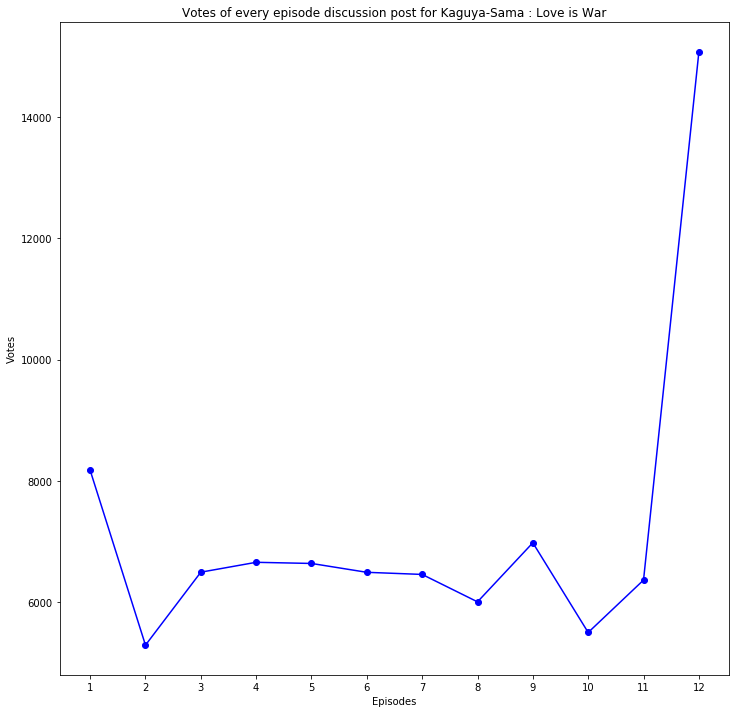

<Figure size 576x576 with 0 Axes>

In [454]:
pypl.figure(figsize=(12,12))
pypl.plot(np.arange(1,13),kag['Upvotes'],marker='o', color='b')
pypl.xlabel('Episodes')
pypl.ylabel('Votes')
pypl.title('Votes of every episode discussion post for Kaguya-Sama : Love is War')
pypl.xticks(np.arange(1,13))
pypl.figure(figsize=(8,8))
pypl.show()

In [455]:
kaga = [kdf1,kdf2,kdf3,kdf4,kdf5,kdf6,kdf7,kdf8,kdf9,kdf10,kdf11,kdf12]

comment_count = []
negative_count = []
positive_count = []
neutral_count = []

for index, dataset in enumerate(kaga):
    cata = dataset
    comment_count.append(cata.shape[0])
    
    cas = dataset['Actual Polarity']
    ars = cas.value_counts()
    
    negative_count.append(ars[0])
    positive_count.append(ars[1])
    neutral_count.append(ars[2])

Kaguya_total_count = pd.DataFrame({'Episodes':kag['Episodes'],
                                   'Upvotes':kag['Upvotes'],
                                   'Total Comment Count':comment_count,
                                   'Number of Positive Comments': positive_count,
                                   'Number of Negative Comments': negative_count,
                                   'Number of Neutral Comments': neutral_count})
ags = display(HTML(Kaguya_total_count.to_html(index=False)))

Episodes,Upvotes,Total Comment Count,Number of Positive Comments,Number of Negative Comments,Number of Neutral Comments
Episode 1,8175,1465,792,148,525
Episode 2,5291,1119,536,84,499
Episode 3,6494,1285,738,67,480
Episode 4,6657,1308,792,72,444
Episode 5,6638,1093,598,84,411
Episode 6,6492,1178,620,82,476
Episode 7,6457,1485,581,158,746
Episode 8,6005,1106,529,67,509
Episode 9,6979,1358,684,44,630
Episode 10,5500,1111,529,90,492


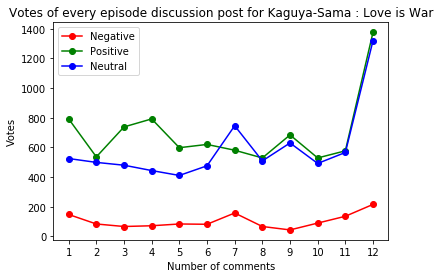

<Figure size 576x576 with 0 Axes>

In [456]:
pypl.figure()
pypl.plot(np.arange(1,13),negative_count, color='r',marker='o',label='Negative')
pypl.plot(np.arange(1,13),positive_count, color='g',marker='o',label='Positive')
pypl.plot(np.arange(1,13),neutral_count, color='b',marker='o',label='Neutral')
pypl.xlabel('Number of comments')
pypl.ylabel('Votes')
pypl.title('Votes of every episode discussion post for Kaguya-Sama : Love is War')
pypl.legend()
pypl.xticks(np.arange(1,13))
pypl.figure(figsize=(8,8))
pypl.show()

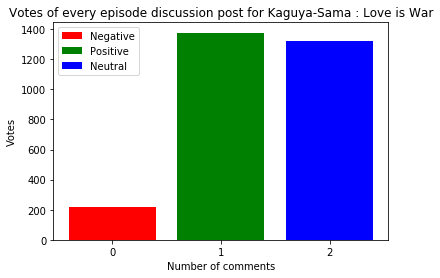

<Figure size 576x576 with 0 Axes>

In [457]:
pos = np.sum(negative_count)
neg = np.sum(positive_count)
neu = np.sum(neutral_count)

pypl.figure()
pypl.bar([0],negative_count, color='r',label='Negative')
pypl.bar([1],positive_count, color='g',label='Positive')
pypl.bar([2],neutral_count, color='b',label='Neutral')
pypl.xlabel('Number of comments')
pypl.ylabel('Votes')
pypl.title('Votes of every episode discussion post for Kaguya-Sama : Love is War')
pypl.legend()
pypl.xticks(np.arange(0,3))
pypl.figure(figsize=(8,8))
pypl.show()

In [458]:
contract = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

stopword = stopwords.words('english')
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def penntag(pen):
    morphy_tag = {'NN': 'n', 'JJ': 'a',
                  'VB': 'v', 'RB': 'r'}
    try:
        return morphy_tag[pen[:2]]
    except:
        return 'n'


def comment_cleaner(comm, comment_array):
    temp_comm = []
    megos = ' '
    uncontracted = ' '.join([contract[word] if word in contract else word for word in comm.lower().split()])
    stopwords_removed = [word for word in uncontracted.lower().split() if word not in stopword]
    POS_words = nltk.pos_tag(stopwords_removed)
    for i in range(0, len(POS_words)):
        lemmas = lemma.lemmatize(POS_words[i][0], pos=penntag(POS_words[i][1]))
        temp_comm.append(lemmas)
    # print(temp_comm)
    megos = ' '.join(word for word in temp_comm)
    #comment_array.append(megos)
    return megos
   # comment_array.clear()

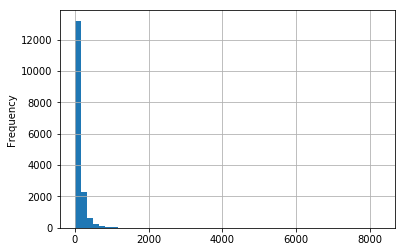

In [459]:
kaga = pd.concat([kdf1,kdf2,kdf3,kdf4,kdf5,kdf6,kdf7,kdf8,kdf9,kdf10,kdf11,kdf12])
kaga = kaga.reset_index(drop=True)

kaga['Comments'] = kaga['Comments'].astype(str)
kaga['Length'] = kaga['Comments'].apply(len)

kaga['Length'].hist( bins=50)
pypl.ylabel('Frequency');
pypl.show()

[('best girl', 225), ('kaguya sama', 179), ('read manga', 174), ('manga reader', 143), ('holy shit', 110), ('feel like', 92), ('voice act', 83), ('one best', 73), ('really good', 72), ('first episode', 70), ('next episode', 70), ('next week', 65), ('koga aoi', 64), ('look like', 63), ('manga spoiler', 63), ('look forward', 61), ('get well', 60), ('second season', 56), ('get good', 56), ('last episode', 56), ('first time', 55), ('ara ara', 52), ('love war', 51), ('last week', 47), ('manga anime', 45), ('kaguya shirogane', 45), ('best part', 44), ('really like', 43), ('one favorite', 41), ('love kaguya', 40), ('hayasaka best', 39), ('oh god', 38), ('seem like', 37), ('pretty much', 37), ('want see', 37), ('even well', 37), ('every episode', 37), ('anime adaptation', 36), ('source material', 36), ('mind game', 36), ('wait see', 35), ('hope get', 35), ('great episode', 35), ('even though', 34), ('pretty good', 33), ('student council', 33), ('get see', 33), ('really hope', 33), ('ever see',

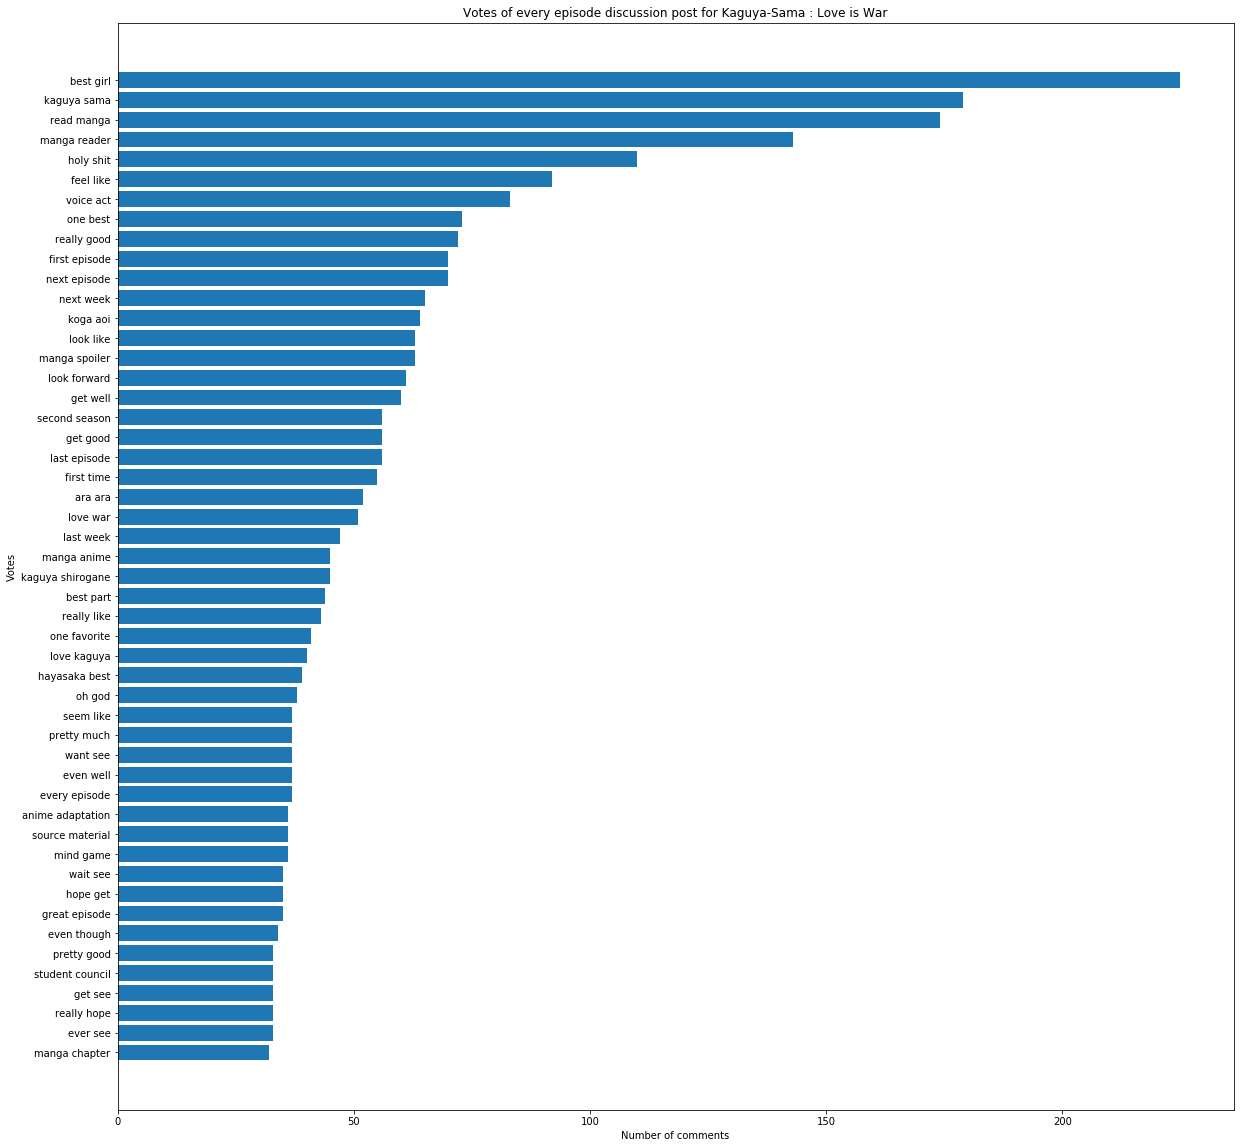

In [460]:
ags = []
x=[]
y=[]
# Remove punctuation marks and tokenize each and every word
kaga['Comments'] = kaga['Comments'].str.replace('[^\w\s]', ' ')
kaga['Comments'] = kaga['Comments'].str.replace('[\d+]', ' ')
kaga['Comments'] = kaga['Comments'].str.replace('(^| ).(( ).)*( |$)', ' ')
kaga['Comments'] = kaga['Comments'].apply(lambda s : comment_cleaner(s, tra))

kaga = kaga[kaga['Length'] > 15]
pso = kaga[kaga['Actual Polarity'] == 1]
vec = CountVectorizer(ngram_range=(2, 2)).fit(pso['Comments'])
#vec = TfidfVectorizer(ngram_range=(2, 2))
bag_of_words = vec.fit_transform(pso['Comments'])
sum_words = bag_of_words.sum(axis=0) 

for word,index in vec.vocabulary_.items():
    ags.append((word,sum_words[0,index]))
 
wgs = sorted(ags,key=lambda x: x[1],reverse=True)
agsa = wgs[:50]
print(agsa)
for i in range(0,len(agsa)):
    aus = agsa[i]
    x.append(aus[0])
    y.append(aus[1])
%matplotlib inline
pypl.figure(figsize=(20,20))
pypl.barh(x,y)
pypl.xlabel('Number of comments')
pypl.gca().invert_yaxis()
pypl.ylabel('Votes')
pypl.title('Votes of every episode discussion post for Kaguya-Sama : Love is War')
pypl.show()

# Tensei Shittara Slime Datta Ken

In [461]:
sdf1 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Tensei Slime cleaned\Tensei Slime Episode 1 .csv',index_col=0, encoding='utf-8-sig')
sdf2 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Tensei Slime cleaned\Tensei Slime Episode 2 .csv',index_col=0, encoding='utf-8-sig')
sdf3 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Tensei Slime cleaned\Tensei Slime Episode 3 .csv',index_col=0, encoding='utf-8-sig')
sdf4 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Tensei Slime cleaned\Tensei Slime Episode 4 .csv',index_col=0, encoding='utf-8-sig')
sdf5 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Tensei Slime cleaned\Tensei Slime Episode 5 .csv',index_col=0, encoding='utf-8-sig')
sdf6 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Tensei Slime cleaned\Tensei Slime Episode 6 .csv',index_col=0, encoding='utf-8-sig')
sdf7 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Tensei Slime cleaned\Tensei Slime Episode 7 .csv',index_col=0, encoding='utf-8-sig')
sdf8 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Tensei Slime cleaned\Tensei Slime Episode 8 .csv',index_col=0, encoding='utf-8-sig')
sdf9 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Tensei Slime cleaned\Tensei Slime Episode 9 .csv',index_col=0, encoding='utf-8-sig')
sdf10 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Tensei Slime cleaned\Tensei Slime Episode 10 .csv',index_col=0, encoding='utf-8-sig')
sdf11 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Tensei Slime cleaned\Tensei Slime Episode 11 .csv',index_col=0, encoding='utf-8-sig')
sdf12 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Tensei Slime cleaned\Tensei Slime Episode 12 .csv',index_col=0, encoding='utf-8-sig')
sdf13 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Tensei Slime cleaned\Tensei Slime Episode 13 .csv',index_col=0, encoding='utf-8-sig')
sdf14 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Tensei Slime cleaned\Tensei Slime Episode 14 .csv',index_col=0, encoding='utf-8-sig')
sdf15 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Tensei Slime cleaned\Tensei Slime Episode 15 .csv',index_col=0, encoding='utf-8-sig')
sdf16 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Tensei Slime cleaned\Tensei Slime Episode 16 .csv',index_col=0, encoding='utf-8-sig')
sdf17 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Tensei Slime cleaned\Tensei Slime Episode 17 .csv',index_col=0, encoding='utf-8-sig')
sdf18 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Tensei Slime cleaned\Tensei Slime Episode 18 .csv',index_col=0, encoding='utf-8-sig')
sdf19 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Tensei Slime cleaned\Tensei Slime Episode 19 .csv',index_col=0, encoding='utf-8-sig')
sdf20 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Tensei Slime cleaned\Tensei Slime Episode 20 .csv',index_col=0, encoding='utf-8-sig')
sdf21 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Tensei Slime cleaned\Tensei Slime Episode 21 .csv',index_col=0, encoding='utf-8-sig')
sdf22 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Tensei Slime cleaned\Tensei Slime Episode 22 .csv',index_col=0, encoding='utf-8-sig')
sdf23 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Tensei Slime cleaned\Tensei Slime Episode 23 .csv',index_col=0, encoding='utf-8-sig')
sdf24 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Tensei Slime cleaned\Tensei Slime Episode 24 .csv',index_col=0, encoding='utf-8-sig')

In [462]:
slime = [sdf1,sdf2,sdf3,sdf4,sdf5,sdf6,sdf7,sdf8,sdf9,sdf10,sdf11,sdf12,sdf13,sdf14,sdf15,sdf16,sdf17,sdf18,sdf19,sdf20,sdf21,sdf22,sdf23,sdf24]


comment_count = []
neg_count = []
pos_count = []
neu_count = []

for index, dataset in enumerate(slime):
    casa = dataset
    comment_count.append(cata.shape[0])
    cas = casa['Actual Polarity']
    ars = cas.value_counts()
    neg_count.append(ars[0])
    pos_count.append(ars[1])
    neu_count.append(ars[2])



Slime_total_count = pd.DataFrame({'Episodes':ten['Episodes'],
                                   'Upvotes':ten['Upvotes'],
                                   'Total Comment Count':comment_count,
                                   'Number of Positive Comments': pos_count,
                                   'Number of Negative Comments': neg_count,
                                   'Number of Neutral Comments': neu_count})
ags = display(HTML(Slime_total_count.to_html(index=False)))

Episodes,Upvotes,Total Comment Count,Number of Positive Comments,Number of Negative Comments,Number of Neutral Comments
Episode 1,2855,2912,484,62,482
Episode 2,2867,2912,396,80,506
Episode 3,2660,2912,491,57,576
Episode 4,3595,2912,502,119,601
Episode 5,2975,2912,420,105,525
Episode 6,3588,2912,394,101,548
Episode 7,4190,2912,443,151,807
Episode 8,3645,2912,410,161,660
Episode 9,3896,2912,482,44,666
Episode 10,3654,2912,420,507,105


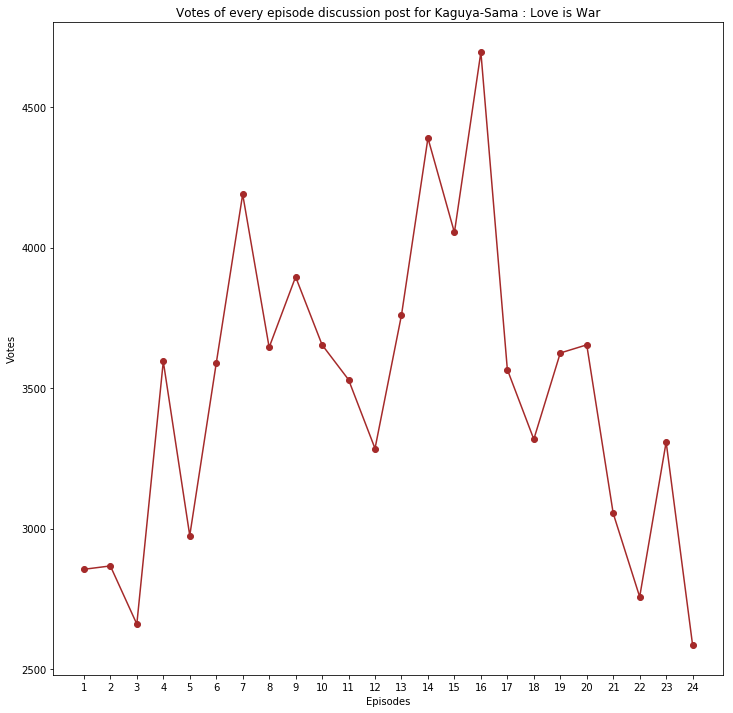

<Figure size 576x576 with 0 Axes>

In [463]:
pypl.figure(figsize=(12,12))
pypl.plot(np.arange(1,25),ten['Upvotes'],marker='o', color='brown')
pypl.xlabel('Episodes')
pypl.ylabel('Votes')
pypl.title('Votes of every episode discussion post for Kaguya-Sama : Love is War')
pypl.xticks(np.arange(1,25))
pypl.figure(figsize=(8,8))
pypl.show()

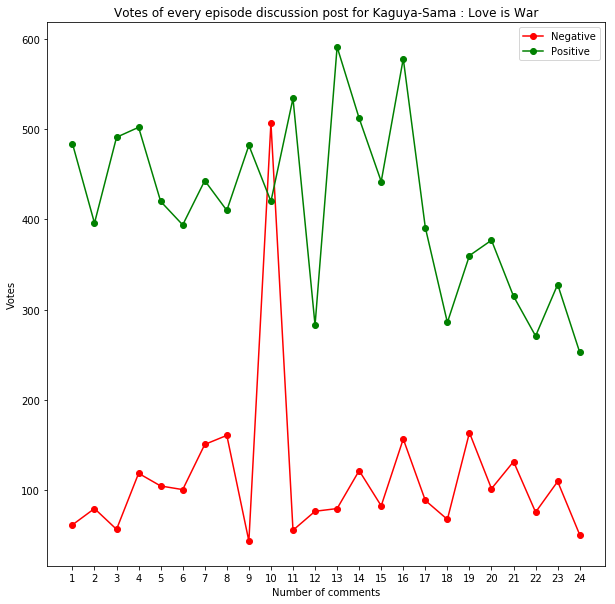

In [464]:
pypl.figure(figsize=(10,10))
pypl.plot(np.arange(1,25),neg_count, color='r',marker='o',label='Negative')
pypl.plot(np.arange(1,25),pos_count, color='g',marker='o',label='Positive')
#pypl.plot(np.arange(1,25),neu_count, color='b',marker='o',label='Neutral')
pypl.xlabel('Number of comments')
pypl.ylabel('Votes')
pypl.title('Votes of every episode discussion post for Kaguya-Sama : Love is War')
pypl.legend()
pypl.xticks(np.arange(1,25))
pypl.show()

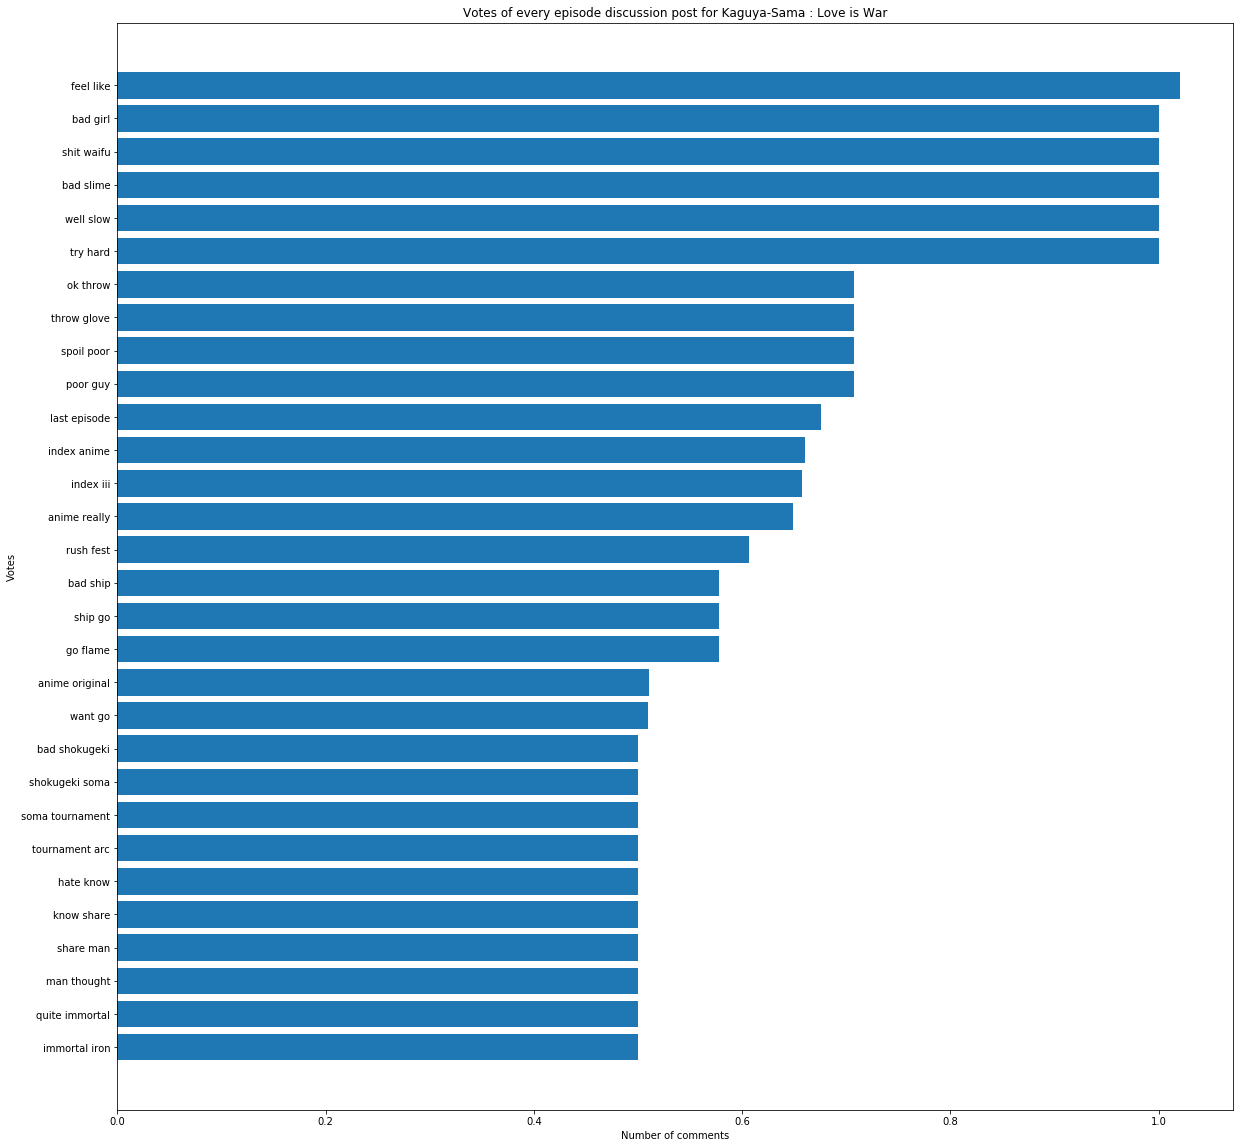

In [525]:
stopword = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def penntag(pen):
    morphy_tag = {'NN': 'n', 'JJ': 'a',
                  'VB': 'v', 'RB': 'r'}
    try:
        return morphy_tag[pen[:2]]
    except:
        return 'n'


def comment_cleaner(comm, comment_array):
    temp_comm = []
    megos = ' '
    uncontracted = ' '.join([contract[word] if word in contract else word for word in comm.lower().split()])
    stopwords_removed = [word for word in uncontracted.lower().split() if word not in stopword]
    POS_words = nltk.pos_tag(stopwords_removed)
    for i in range(0, len(POS_words)):
        lemmas = lemma.lemmatize(POS_words[i][0], pos=penntag(POS_words[i][1]))
        temp_comm.append(lemmas)
    # print(temp_comm)
    megos = ' '.join(word for word in temp_comm)
    #comment_array.append(megos)
    return megos
   # comment_array.clear()

tra = []
slimq = sdf22
slimq['Comments'] = slimq['Comments'].astype(str)
#slimq['Length'] =  slimq['Comments'].apply(len)
slimq['Comments'] = slimq['Comments'].str.replace('[^\w\s]', ' ')
slimq['Comments'] = slimq['Comments'].str.replace('[\d+]', ' ')
slimq['Comments'] = slimq['Comments'].str.replace('(^| ).(( ).)*( |$)', ' ')
slimq['Comments'] = slimq['Comments'].apply(lambda s : comment_cleaner(s, tra))
a = slimq[slimq['Actual Polarity'] == 0]
#a = slimq[slimq['Actual Polarity'] == '2']

#vec = CountVectorizer(ngram_range=(2, 2)).fit(a['Comments'])
vec = TfidfVectorizer(ngram_range=(2, 2))
bag_of_words = vec.fit_transform(a['Comments'])
sum_words = bag_of_words.sum(axis=0) 
agso = []
for word,index in vec.vocabulary_.items():
    agso.append((word,sum_words[0,index]))
wgso = sorted(agso,key=lambda x: x[1],reverse=True)
agsa = wgso[:30]
x = []
y = []
for i in range(0,len(agsa)):
    aus = agsa[i]
    x.append(aus[0])
    y.append(aus[1])
%matplotlib inline
pypl.figure(figsize=(20,20))
pypl.barh(x,y)
pypl.xlabel('Number of comments')
pypl.gca().invert_yaxis()
pypl.ylabel('Votes')
pypl.title('Votes of every episode discussion post for Kaguya-Sama : Love is War')
pypl.show()

# Boogiepop Wa Waranai

In [494]:
bdf1 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Boogiepop cleaned\Boogiepop Wa Waranai Episode 1 .csv',index_col=0, encoding='utf-8-sig')
bdf2 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Boogiepop cleaned\Boogiepop Wa Waranai Episode 2 .csv',index_col=0, encoding='utf-8-sig')
bdf3 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Boogiepop cleaned\Boogiepop Wa Waranai Episode 3 .csv',index_col=0, encoding='utf-8-sig')
bdf4 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Boogiepop cleaned\Boogiepop Wa Waranai Episode 4 .csv',index_col=0, encoding='utf-8-sig')
bdf5 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Boogiepop cleaned\Boogiepop Wa Waranai Episode 5 .csv',index_col=0, encoding='utf-8-sig')
bdf6 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Boogiepop cleaned\Boogiepop Wa Waranai Episode 6 .csv',index_col=0, encoding='utf-8-sig')
bdf7 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Boogiepop cleaned\Boogiepop Wa Waranai Episode 7 .csv',index_col=0, encoding='utf-8-sig')
bdf8 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Boogiepop cleaned\Boogiepop Wa Waranai Episode 8 .csv',index_col=0, encoding='utf-8-sig')
bdf9 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Boogiepop cleaned\Boogiepop Wa Waranai Episode 9 .csv',index_col=0, encoding='utf-8-sig')
bdf10 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Boogiepop cleaned\Boogiepop Wa Waranai Episode 10 .csv',index_col=0, encoding='utf-8-sig')
bdf11 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Boogiepop cleaned\Boogiepop Wa Waranai Episode 11 .csv',index_col=0, encoding='utf-8-sig')
bdf12 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Boogiepop cleaned\Boogiepop Wa Waranai Episode 12 .csv',index_col=0, encoding='utf-8-sig')
bdf13 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Boogiepop cleaned\Boogiepop Wa Waranai Episode 13 .csv',index_col=0, encoding='utf-8-sig')
bdf14 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Boogiepop cleaned\Boogiepop Wa Waranai Episode 14 .csv',index_col=0, encoding='utf-8-sig')
bdf15 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Boogiepop cleaned\Boogiepop Wa Waranai Episode 15 .csv',index_col=0, encoding='utf-8-sig')
bdf16 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Boogiepop cleaned\Boogiepop Wa Waranai Episode 16 .csv',index_col=0, encoding='utf-8-sig')
bdf17 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Boogiepop cleaned\Boogiepop Wa Waranai Episode 17 .csv',index_col=0, encoding='utf-8-sig')
bdf18 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Boogiepop cleaned\Boogiepop Wa Waranai Episode 18 .csv',index_col=0, encoding='utf-8-sig')

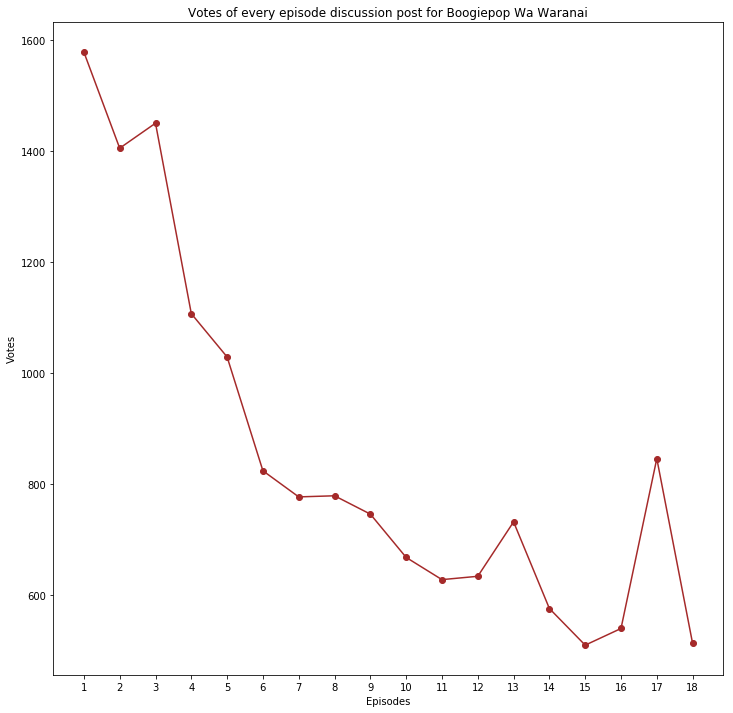

<Figure size 576x576 with 0 Axes>

In [495]:
pypl.figure(figsize=(12,12))
pypl.plot(np.arange(1,19),bog['Upvotes'],marker='o', color='brown')
pypl.xlabel('Episodes')
pypl.ylabel('Votes')
pypl.title('Votes of every episode discussion post for Boogiepop Wa Waranai')
pypl.xticks(np.arange(1,19))
pypl.figure(figsize=(8,8))
pypl.show()

In [496]:
boogie = [bdf1,bdf2,bdf3,bdf4,bdf5,bdf6,bdf7,bdf8,bdf9,bdf10,bdf11,bdf12,bdf13,bdf14,bdf15,bdf16,bdf17,bdf18]
#bog = [bdf15]

comment_count = []
n_count = []
p_count = []
ne_count = []

for index, dataset in enumerate(boogie):
    cata = dataset
    comment_count.append(cata.shape[0])
    cas = cata['Actual Polarity']
    ars = cas.value_counts()
    n_count.append(ars[0])
    p_count.append(ars[1])
    ne_count.append(ars[2])


Boogie_total_count = pd.DataFrame({'Episodes':bog['Episodes'],
                                   'Upvotes':bog['Upvotes'],
                                   'Total Comment Count':comment_count,
                                   'Number of Positive Comments': p_count,
                                   'Number of Negative Comments': n_count,
                                   'Number of Neutral Comments': ne_count})
ags = display(HTML(Boogie_total_count.to_html(index=False)))

Episodes,Upvotes,Total Comment Count,Number of Positive Comments,Number of Negative Comments,Number of Neutral Comments
Episode 1,1578,373,205,26,139
Episode 2,1405,467,205,53,208
Episode 3,1450,567,299,75,193
Episode 4,1107,279,164,10,105
Episode 5,1029,271,132,53,86
Episode 6,824,183,84,29,70
Episode 7,777,154,59,42,53
Episode 8,779,124,70,16,38
Episode 9,746,230,127,27,76
Episode 10,668,61,38,4,19


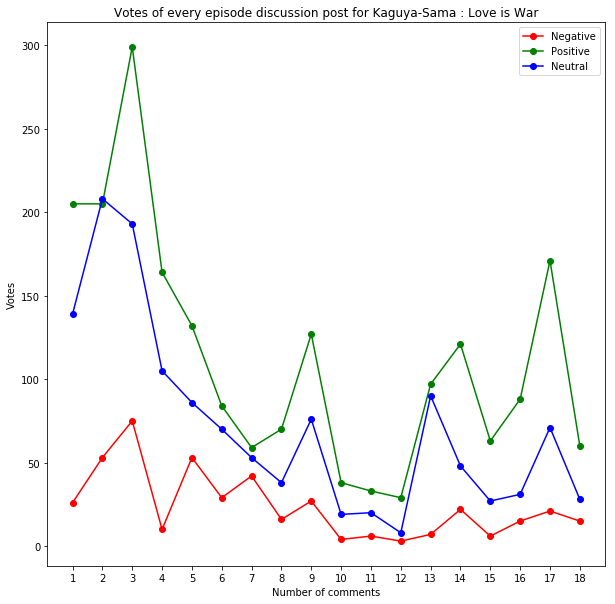

In [497]:
pypl.figure(figsize=(10,10))
pypl.plot(np.arange(1,19),n_count, color='r',marker='o',label='Negative')
pypl.plot(np.arange(1,19),p_count, color='g',marker='o',label='Positive')
pypl.plot(np.arange(1,19),ne_count, color='b',marker='o',label='Neutral')
pypl.xlabel('Number of comments')
pypl.ylabel('Votes')
pypl.title('Votes of every episode discussion post for Kaguya-Sama : Love is War')
pypl.legend()
pypl.xticks(np.arange(1,19))

pypl.show()

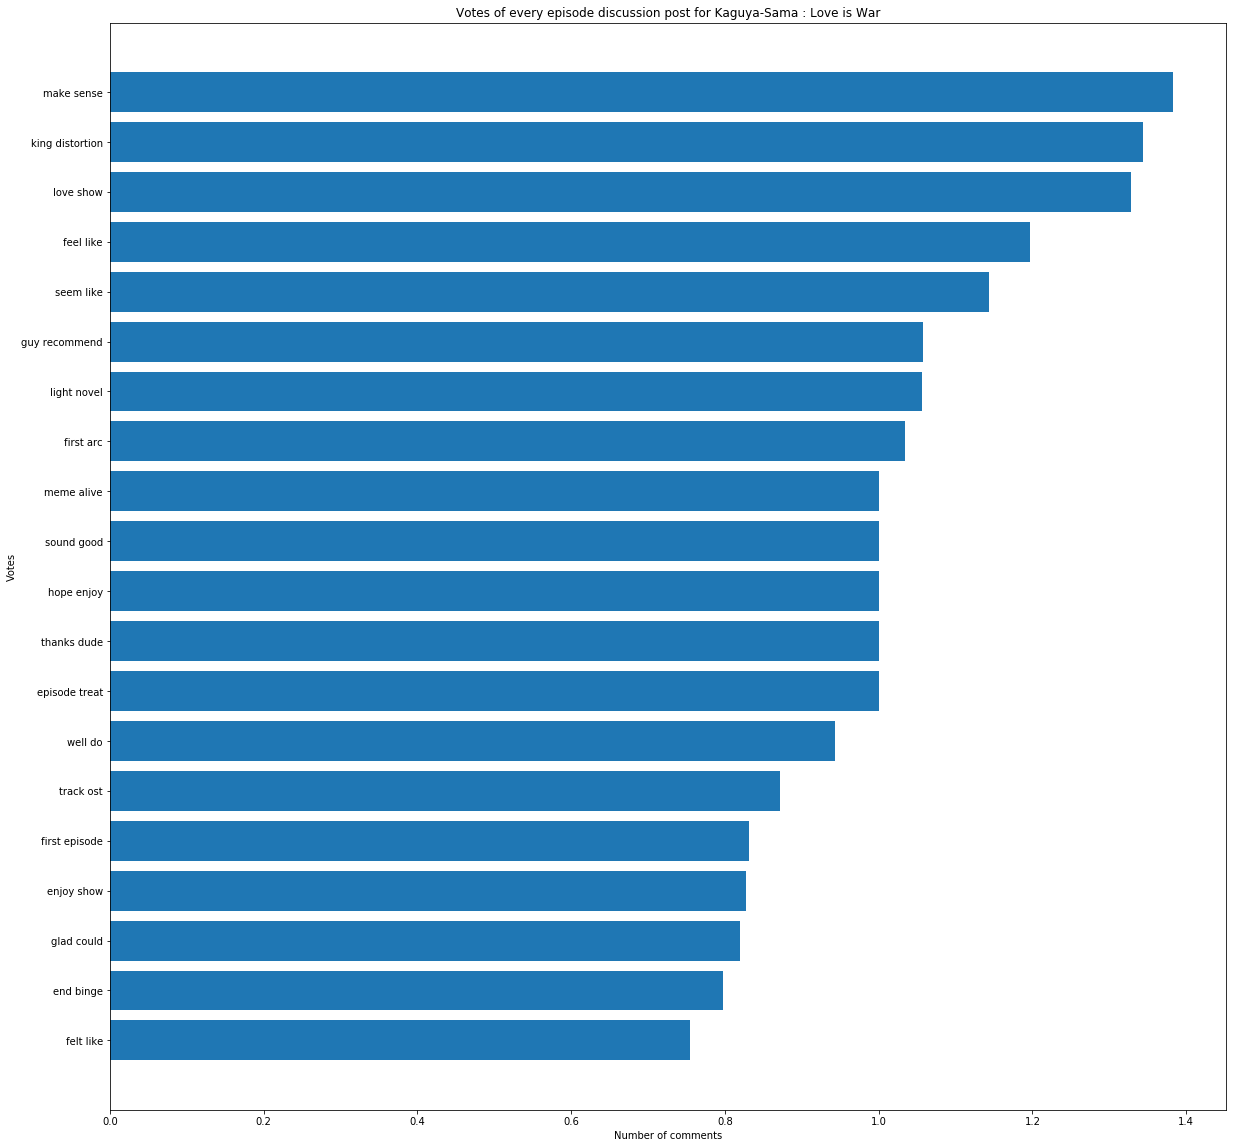

In [506]:
stopword = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def penntag(pen):
    morphy_tag = {'NN': 'n', 'JJ': 'a',
                  'VB': 'v', 'RB': 'r'}
    try:
        return morphy_tag[pen[:2]]
    except:
        return 'n'


def comment_cleaner(comm, comment_array):
    temp_comm = []
    megos = ' '
    uncontracted = ' '.join([contract[word] if word in contract else word for word in comm.lower().split()])
    stopwords_removed = [word for word in uncontracted.lower().split() if word not in stopword]
    POS_words = nltk.pos_tag(stopwords_removed)
    for i in range(0, len(POS_words)):
        lemmas = lemma.lemmatize(POS_words[i][0], pos=penntag(POS_words[i][1]))
        temp_comm.append(lemmas)
    # print(temp_comm)
    megos = ' '.join(word for word in temp_comm)
    #comment_array.append(megos)
    return megos
   # comment_array.clear()

tra = []
boog = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Boogiepop cleaned\Boogiepop Wa Waranai Episode 17 .csv',index_col=0, encoding='utf-8-sig')

boog['Comments'] = boog['Comments'].astype(str)
boog['Comments'] = boog['Comments'].str.replace('[^\w\s]', ' ')
boog['Comments'] = boog['Comments'].str.replace('[\d+]', ' ')
boog['Comments'] = boog['Comments'].str.replace('(^| ).(( ).)*( |$)', ' ')
boog['Comments'] = boog['Comments'].apply(lambda s : comment_cleaner(s, tra))
a = boog[boog['Actual Polarity'] == 1]

#vec = CountVectorizer(ngram_range=(1, 2)).fit(a['Comments'])
vec = TfidfVectorizer(ngram_range=(2, 2))
bag_of_words = vec.fit_transform(a['Comments'])
sum_words = bag_of_words.sum(axis=0) 
agso = []
for word,index in vec.vocabulary_.items():
    agso.append((word,sum_words[0,index]))
wgso = sorted(agso,key=lambda x: x[1],reverse=True)
agsa = wgso[:20]
x = []
y = []
for i in range(0,len(agsa)):
    aus = agsa[i]
    x.append(aus[0])
    y.append(aus[1])
%matplotlib inline
pypl.figure(figsize=(20,20))
pypl.barh(x,y)
pypl.xlabel('Number of comments')
pypl.gca().invert_yaxis()
pypl.ylabel('Votes')
pypl.title('Votes of every episode discussion post for Kaguya-Sama : Love is War')
pypl.show()